In [9]:
# importing liberaries
import ast
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_da_us

In [10]:
# converting the series to dataframe as it is easier to use seaborn
df_da_us['job_location'].value_counts().head(10).to_frame()

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


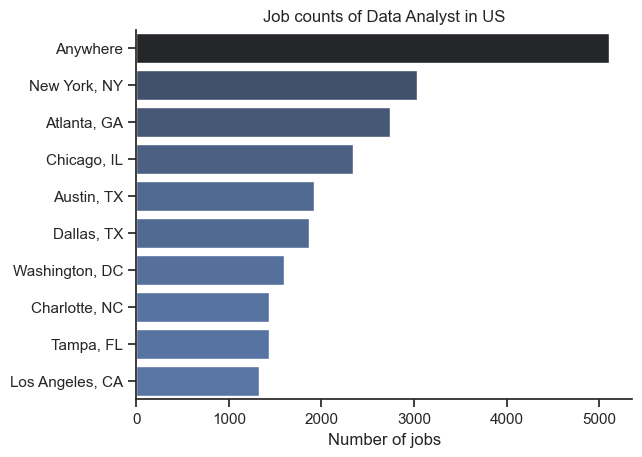

In [21]:
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('Job counts of Data Analyst in US')
sns.despine() # to remove the borders around the graph
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

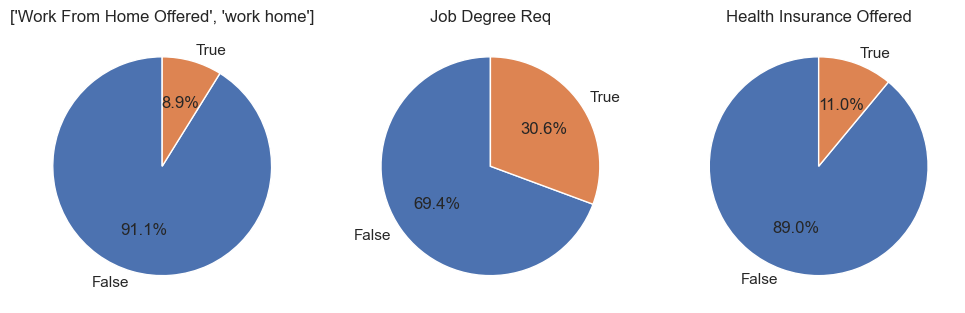

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5)) # setting the correct size of the figure

# creating a dictionary first to loop through the values in job_work_from_home, job_no_degree_mention
# and job_health_insurance
dict_column = { 
   'job_work_from_home': 'Work From Home Offered',
   'job_no_degree_mention': 'Job Degree Req',
   'job_health_insurance': 'Health Insurance Offered'
}

 # looping through the dictionary items created above
for i, (column, title) in enumerate(dict_column.items()): # putting column and title in bracket as they are tuples
			# print(i, column, title)
			ax[i].pie(df[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ('False', 'True'))
			ax[i].set_title(title) 

plt.show()


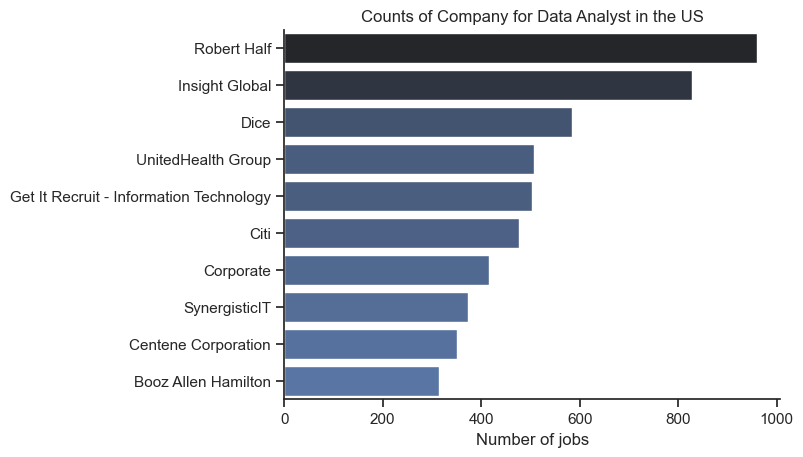

In [29]:
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('Counts of Company for Data Analyst in the US')
sns.despine() # to remove the borders around the graph
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()